In [ ]:
!pip install spacy==3.0.6

In [ ]:
import pandas as pd
import glob
import json

In [ ]:
data_path = '/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data'

### Sentenze Penali Cassazione
http://www.italgiure.giustizia.it/sncass/ 

In [ ]:
pdf1 = pd.read_csv(data_path +'/sentenze_penale_pdf.csv')
pdf2 = pd.read_csv(data_path +'/sentenze_penale_pdf2.csv')

In [ ]:
pdfs = pd.concat([pdf1,pdf2])

In [ ]:
pdfs

,link,text
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: AMICO MASSIM...
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...
...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...


In [ ]:
pdfs['text'].nunique()

216

In [ ]:
pdfs['chars'] = pdfs['text'].apply(len)
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: AMICO MASSIM...,47626
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


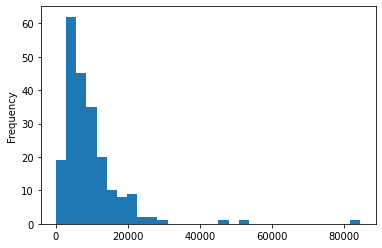

In [ ]:
pdfs['chars'].plot.hist(bins=30)

In [ ]:
pdfs = pdfs[pdfs['chars']<40000]
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


In [ ]:
pdfs[pdfs['chars'] <200]

,link,text,chars
14,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46388 Anno 2021Pre...,124
17,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46138 Anno 2021Pre...,134
37,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46416 Anno 2021Pre...,125
65,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 2 Num. 46876 Anno 2021Pre...,130
83,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46410 Anno 2021Pre...,123
86,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 46135 Anno 2021Pre...,116
99,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 6 Num. 45839 Anno 2021Pre...,120
116,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 3 Num. 46817 Anno 2021Pre...,119
135,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 2 Num. 46758 Anno 2021Pre...,127
140,http://www.italgiure.giustizia.it/xway/applica...,Penale Sent. Sez. 4 Num. 46156 Anno 2021Pre...,124


In [ ]:
#Remove the lines that have a short text that correspond to judgments in the darkening phase
pdfs = pdfs[pdfs['chars'] > 200]

In [ ]:
pdfs

,link,text,chars
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251
...,...,...,...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973
6,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649


In [ ]:
pdfs['subtext'] = pdfs['text'].apply(lambda x: x.replace("'"," "))

pdfs['subtext'] = pdfs['subtext'].apply(lambda x: x[x.find(' 1.')+3: x.find(' 1.') + 500])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
pdfs.to_csv(data_path +'/sentenze_penali_clean.csv', index = False)

In [ ]:
df = pd.read_csv(data_path +'/sentenze_penali_clean.csv')
df

,link,text,chars,subtext
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104,Con sentenza del 30 novembre 2021 la Corte d ...
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176,La Corte di Appello di Campobasso confermava l...
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557,"11 Tribunale di Pavia, con sentenza ex art. 44..."
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112,La Corte di appello di Firenze ha confermato ...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251,"Il Tribunale di Milano, in riforma della sent..."
...,...,...,...,...
195,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Mastrogiacomo...,2949,"Francesco Mastrogiaconno, attraverso il propr..."
196,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Aliotta Andre...,5973,Con ordinanza del 29/7/2021 il Tribunale di C...
197,http://www.italgiure.giustizia.it/xway/applica...,letta la requisitoria del Procuratore Generale...,2723,"Con l ordinanza indicata in epigrafe, emessa ..."
198,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,9649,Con l ordinanza impugnata il Tribunale di Cag...


### Annotation

Use this web tool https://abera87.github.io/annotate/ from this paper https://arxiv.org/pdf/2108.08184.pdf

First sample

In [ ]:
sample_1 = df.head(26)
sample_1

,link,text,chars,subtext
0,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto dal Procuratore ...,23104,Con sentenza del 30 novembre 2021 la Corte d ...
1,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: IULIANO NADI...,11176,La Corte di Appello di Campobasso confermava l...
2,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: BORSAN MARIC...,6557,"11 Tribunale di Pavia, con sentenza ex art. 44..."
3,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATRUNO GIUS...,6112,La Corte di appello di Firenze ha confermato ...
4,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: HERRERA ARA ...,5251,"Il Tribunale di Milano, in riforma della sent..."
5,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: LEVAKOVIC MI...,10392,"La Corte di appello di Perugia, in parziale r..."
6,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: GIUGNO DARIO...,10233,"Dario Giugno, a mezzo del proprio difensore, h..."
7,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: MERLETTI ERC...,6083,Il Giudice di pace di Teramo ha condannato Er...
8,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Pelle Sebasti...,15108,"Con il provvedimento in epigrafe indicato, la..."
9,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Parrinello Vi...,20955,Con sentenza del 9 novembre 2021 la Corte di ...


In [ ]:
txt = " \n ".join(s.lower() for s in sample_1['subtext'])

In [ ]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_1.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

In [ ]:
s1 = pd.read_json(data_path + '/Output_1.json').head(27)
s1

,SentId,SentText,EntityMentions,RelationMentions
0,0,con sentenza del 30 novembre 2021 la corte d ...,"[corte d appello, tonuzi]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
1,1,la corte di appello di campobasso confermava ...,"[iuliano, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'iulian..."
2,2,"11 tribunale di pavia, con sentenza ex art. 4...","[borsan, socio, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'borsan..."
3,3,la corte di appello di firenze ha confermato...,"[patruno, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,4,"il tribunale di milano, in riforma della sen...","[herrera, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'herrer..."
5,5,"la corte di appello di perugia, in parziale ...","[hudorovich, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
6,6,"dario giugno, a mezzo del proprio difensore, ...","[giugno, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'giugno..."
7,7,il giudice di pace di teramo ha condannato e...,"[merletti, giudice]","[{'Arg1Text': 'giudice', 'Arg2Text': 'merletti..."
8,8,"con il provvedimento in epigrafe indicato, l...","[pelle, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
9,9,con sentenza del 9 novembre 2021 la corte di...,"[corte di appello, parrinello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."


In [ ]:
s1 = s1[s1['EntityMentions'] != s1['RelationMentions'] ]
s1.reset_index(drop = True, inplace = True)
s1

,SentId,SentText,EntityMentions,RelationMentions
0,0,con sentenza del 30 novembre 2021 la corte d ...,"[corte d appello, tonuzi]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
1,1,la corte di appello di campobasso confermava ...,"[iuliano, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'iulian..."
2,2,"11 tribunale di pavia, con sentenza ex art. 4...","[borsan, socio, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'borsan..."
3,3,la corte di appello di firenze ha confermato...,"[patruno, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,4,"il tribunale di milano, in riforma della sen...","[herrera, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'herrer..."
5,5,"la corte di appello di perugia, in parziale ...","[hudorovich, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
6,6,"dario giugno, a mezzo del proprio difensore, ...","[giugno, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'giugno..."
7,7,il giudice di pace di teramo ha condannato e...,"[merletti, giudice]","[{'Arg1Text': 'giudice', 'Arg2Text': 'merletti..."
8,8,"con il provvedimento in epigrafe indicato, l...","[pelle, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
9,9,con sentenza del 9 novembre 2021 la corte di...,"[corte di appello, parrinello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."


Second sample

In [ ]:
df = pd.read_csv(data_path +'/sentenze_penali_clean.csv')
sample_2 = df[df.index >26].head(23)
sample_2

,link,text,chars,subtext
27,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: DE ROSA GIUS...,8452,Con ordinanza in data 27 aprile 2021 il Tribu...
28,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: TESTA SILVIO...,4606,Con ricorso straordinario ex art. 625-bis cod...
29,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: TOGNAZZI IVA...,4101,"Con sentenza del 17 dicembre 2020, resa ai se..."
30,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PROCURATORE ...,3409,Con sentenza del 7 ottobre 2020 il Tribunale ...
31,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: BEN JAFER IS...,8321,La Corte di Appello di Ancona con sentenza de...
32,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PATTI CALOGE...,8241,La Corte d Appello di Palermo ha rigettato la...
33,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: PALUMBO SAVE...,8722,"Con ordinanza resa il 10 dicembre 2020, la Co..."
34,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: RAMETTA FABR...,9009,"La Corte d appello di Salerno, con ordinanza ..."
35,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da: PISANIELLO R...,12990,"La Corte d appello di Napoli, in data 27 sett..."
36,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: FERRARA LUIG...,8302,A seguito di annullamento con rinvio disposto...


In [ ]:
txt = " \n ".join(s.lower() for s in sample_2['subtext'])

In [ ]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_2.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

In [ ]:
s2 = pd.read_json(data_path + '/Output_2.json')
s2

,SentId,SentText,EntityMentions,RelationMentions
0,0,con ordinanza in data 27 aprile 2021 il tribu...,"[faraoni, nicola de rosa, giuseppe de rosa, tr...","[{'Arg1Text': 'tribunale', 'Arg2Text': 'faraon..."
1,1,con ricorso straordinario ex art. 625-bis co...,"[testa, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'testa'..."
2,2,"con sentenza del 17 dicembre 2020, resa ai s...","[tribunale, tognazzi]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'tognaz..."
3,3,con sentenza del 7 ottobre 2020 il tribunale...,"[ouriniche, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'ourini..."
4,4,la corte di appello di ancona con sentenza d...,"[jafer, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'jafer'..."
5,5,la corte d appello di palermo ha rigettato l...,"[corte d appello, patti]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
6,6,"con ordinanza resa il 10 dicembre 2020, la c...","[palumbo, corte d appello]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
7,7,"la corte d appello di salerno, con ordinanza...","[corte d appello, rametta]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
8,8,"la corte d appello di napoli, in data 27 set...","[giudice, pisaniello, ilario, giaquinto]","[{'Arg1Text': 'giudice', 'Arg2Text': 'pisaniel..."
9,9,a seguito di annullamento con rinvio dispost...,"[corte d appello, ferrara]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."


thrid sample

In [ ]:
df = pd.read_csv(data_path +'/sentenze_penali_clean.csv')
sample_3 = df[df.index >49].head(50)
sample_3

,link,text,chars,subtext
50,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: CARDONE ANTO...,8353,"Antonio Cardone ricorre, a mezzo del proprio ..."
51,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: SOFIA TINDAR...,4556,"Con ordinanza del 19 aprile 2021, la Corte di..."
52,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Rosus Ioan (C...,4270,Con la sentenza impugnata la Corte d appello ...
53,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da Scuto Salvato...,4897,Con la sentenza impugnata la Corte d appello ...
54,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: DANCI DUMITR...,5940,"1 Con ordinanza in data 11 marzo 2021, il trib..."
55,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sui ricorsi proposti da 1. Pucci Gian...,12265,"Pucci Gianluca, nato a Roma il 23/09/1982 2. ..."
56,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: BERNARDI PAT...,2536,"Con sentenza dell 11/11/2019, la Corte di app..."
57,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: SGUAZZINI SI...,11712,Con decreto del 12 gennaio 2021 il giudice pe...
58,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da HUANG JIANQIU...,12302,Con l impugnata ordinanza il Tribunale di Roma...
59,http://www.italgiure.giustizia.it/xway/applica...,SENTENZA sul ricorso proposto da: CIAPPINA FRA...,5066,"La Corte di appello di Milano, con ordinanza ..."


In [ ]:
txt = " \n ".join(s.lower() for s in sample_3['subtext'])

In [ ]:
ann_file = open("/content/drive/MyDrive/TA_project/progetto_TA/NLP_Anonymization/data/annotation_sample_3.txt", "w")
 
ann_file.write(txt)
 
ann_file.close()

In [ ]:
s3 = pd.read_json(data_path + '/Output_3.json')
s3

,SentId,SentText,EntityMentions,RelationMentions
0,0,"antonio cardone ricorre, a mezzo del proprio ...","[cardone, difensore, corte d appello]","[{'Arg1Text': 'difensore', 'Arg2Text': 'cardon..."
1,1,"con ordinanza del 19 aprile 2021, la corte d...","[corte di appello, tindaro]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,2,con la sentenza impugnata la corte d appello...,"[corte d appello, rosus]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
3,3,con la sentenza impugnata la corte d appello...,"[corte d appello, scuto]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
4,4,"1 con ordinanza in data 11 marzo 2021, il tri...","[dumitru, g.i.p]","[{'Arg1Text': 'g.i.p', 'Arg2Text': 'dumitru', ..."
5,5,"pucci gianluca, nato a roma il 23/09/1982 2....","[pucci, di franco, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
6,6,"con sentenza dell 11/11/2019, la corte di ap...","[bernardi, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
7,7,con decreto del 12 gennaio 2021 il giudice p...,"[biolevano s.r.l., sguazzini, giudice]","[{'Arg1Text': 'giudice', 'Arg2Text': 'biolevan..."
8,8,con l impugnata ordinanza il tribunale di rom...,"[huang, avv. francesco simon]","[{'Arg1Text': 'avv. francesco simon', 'Arg2Tex..."
9,9,"la corte di appello di milano, con ordinanza...","[ciappina, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."


In [ ]:
s3 = s3[s3['EntityMentions'] != s3['RelationMentions'] ]
s3.reset_index(drop = True, inplace = True)
s3

,SentId,SentText,EntityMentions,RelationMentions
0,0,"antonio cardone ricorre, a mezzo del proprio ...","[cardone, difensore, corte d appello]","[{'Arg1Text': 'difensore', 'Arg2Text': 'cardon..."
1,1,"con ordinanza del 19 aprile 2021, la corte d...","[corte di appello, tindaro]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
2,2,con la sentenza impugnata la corte d appello...,"[corte d appello, rosus]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
3,3,con la sentenza impugnata la corte d appello...,"[corte d appello, scuto]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
4,4,"1 con ordinanza in data 11 marzo 2021, il tri...","[dumitru, g.i.p]","[{'Arg1Text': 'g.i.p', 'Arg2Text': 'dumitru', ..."
5,5,"pucci gianluca, nato a roma il 23/09/1982 2....","[pucci, di franco, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
6,6,"con sentenza dell 11/11/2019, la corte di ap...","[bernardi, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
7,7,con decreto del 12 gennaio 2021 il giudice p...,"[biolevano s.r.l., sguazzini, giudice]","[{'Arg1Text': 'giudice', 'Arg2Text': 'biolevan..."
8,8,con l impugnata ordinanza il tribunale di rom...,"[huang, avv. francesco simon]","[{'Arg1Text': 'avv. francesco simon', 'Arg2Tex..."
9,9,"la corte di appello di milano, con ordinanza...","[ciappina, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."


In [ ]:
data_annotated = pd.concat([s1,s2,s3])
data_annotated.reset_index(inplace = True,drop= True)
data_annotated

,SentId,SentText,EntityMentions,RelationMentions
0,0,con sentenza del 30 novembre 2021 la corte d ...,"[corte d appello, tonuzi]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
1,1,la corte di appello di campobasso confermava ...,"[iuliano, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'iulian..."
2,2,"11 tribunale di pavia, con sentenza ex art. 4...","[borsan, socio, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'borsan..."
3,3,la corte di appello di firenze ha confermato...,"[patruno, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,4,"il tribunale di milano, in riforma della sen...","[herrera, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'herrer..."
...,...,...,...,...
89,44,"farjallah hamdí, tramite.- il difensore di f...","[farjallah, difensore, hamdí]","[{'Arg1Text': 'difensore', 'Arg2Text': 'hamdí'..."
90,46,con istanza ex art. 671 cod.proc.pen. tondo ...,"[tondo, gip]","[{'Arg1Text': 'gip', 'Arg2Text': 'tondo', 'Rel..."
91,47,con l ordinanza in epigrafe il gip del tribu...,"[gip, nwabanne]","[{'Arg1Text': 'gip', 'Arg2Text': 'nwabanne', '..."
92,48,con istanza ex art. 671 cod.proc.pen. trapan...,"[trapani, corte d appello]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."


In [ ]:
data_annotated.drop('SentId',axis = 1, inplace = True)

In [ ]:
def remove_repetition(lista):
    lista_new = []
    for x in lista:
        contenuto = []
        for s in lista:
            if x != s:
                contenuto.append(x in s)
        if not (True in contenuto):
            lista_new.append(x)
    return lista_new

In [ ]:
remove_repetition(data_annotated.iloc[13]['EntityMentions'])

['de leo', 'corte di appello']

In [ ]:
data_annotated['EntityMentions'] = data_annotated['EntityMentions'].apply(remove_repetition)

In [ ]:
data_annotated

,SentText,EntityMentions,RelationMentions
0,con sentenza del 30 novembre 2021 la corte d ...,"[corte d appello, tonuzi]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
1,la corte di appello di campobasso confermava ...,"[iuliano, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'iulian..."
2,"11 tribunale di pavia, con sentenza ex art. 4...","[borsan, socio, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'borsan..."
3,la corte di appello di firenze ha confermato...,"[patruno, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,"il tribunale di milano, in riforma della sen...","[herrera, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'herrer..."
...,...,...,...
89,"farjallah hamdí, tramite.- il difensore di f...","[farjallah, difensore, hamdí]","[{'Arg1Text': 'difensore', 'Arg2Text': 'hamdí'..."
90,con istanza ex art. 671 cod.proc.pen. tondo ...,"[tondo, gip]","[{'Arg1Text': 'gip', 'Arg2Text': 'tondo', 'Rel..."
91,con l ordinanza in epigrafe il gip del tribu...,"[gip, nwabanne]","[{'Arg1Text': 'gip', 'Arg2Text': 'nwabanne', '..."
92,con istanza ex art. 671 cod.proc.pen. trapan...,"[trapani, corte d appello]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."


I have to replace avv. with avv

In [ ]:
data_annotated['SentText'] = data_annotated['SentText'].apply(lambda x: x.lstrip())

In [ ]:
#data_annotated = data_annotated.drop(index=23).reset_index(drop = True)
data_annotated

,SentText,EntityMentions,RelationMentions
0,con sentenza del 30 novembre 2021 la corte d a...,"[corte d appello, tonuzi]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."
1,la corte di appello di campobasso confermava l...,"[iuliano, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'iulian..."
2,"11 tribunale di pavia, con sentenza ex art. 44...","[borsan, socio, difensore]","[{'Arg1Text': 'difensore', 'Arg2Text': 'borsan..."
3,la corte di appello di firenze ha confermato l...,"[patruno, corte di appello]","[{'Arg1Text': 'corte di appello', 'Arg2Text': ..."
4,"il tribunale di milano, in riforma della sente...","[herrera, tribunale]","[{'Arg1Text': 'tribunale', 'Arg2Text': 'herrer..."
...,...,...,...
89,"farjallah hamdí, tramite.- il difensore di fi...","[farjallah, difensore, hamdí]","[{'Arg1Text': 'difensore', 'Arg2Text': 'hamdí'..."
90,con istanza ex art. 671 cod.proc.pen. tondo pi...,"[tondo, gip]","[{'Arg1Text': 'gip', 'Arg2Text': 'tondo', 'Rel..."
91,con l ordinanza in epigrafe il gip del tribuna...,"[gip, nwabanne]","[{'Arg1Text': 'gip', 'Arg2Text': 'nwabanne', '..."
92,con istanza ex art. 671 cod.proc.pen. trapani ...,"[trapani, corte d appello]","[{'Arg1Text': 'corte d appello', 'Arg2Text': '..."


In [ ]:
data_annotated.iloc[0]['SentText']

'con sentenza del 30 novembre 2021 la corte d appello di bologna ha dichiarato la non sussistenza delle "condizioni per disporre la consegna all autorità giudiziaria del belgio della cittadina albanese tonuzi anxhela", con contestuale revoca della misura cautelare in atto, a seguito del mandato di arresto europeo emesso nei suoi confronti in data 8 gennaio 2021 (n. 107/2020) dalla corte di prima istanza di bruxelles, perché indagata per concorso in traffico internazionale di stupefacenti dl t '

In [ ]:
import re

def clean_sentence(text):

    text = text.replace('sent.', '')
    text = text.replace('num.', '')
    text = text.replace('sez.', '')
    text = text.replace('p. e p.', '')
    text = text.replace('art.', '')
    text = text.replace('artt.', '')
    text = text.replace("d.p.r", '')


    text = re.sub(' +', ' ',text)
    return text


In [ ]:
data_annotated['SentText'].apply(clean_sentence)[7]

'il giudice di pace di teramo ha condannato ercole merletti alla pena di euro 500 di multa, oltre al pagamento delle spese processuali, per il reato di cui all 590 cod. pen., perché, alla guida del proprio velocipide, con colpa consistita in imprudenza e violazione dell 190 d.lgs. 30 aprile 1992, n. 285, investiva, il giorno 11 gennaio 2016, il pedone tiziana di giovanni, provocandole lesioni giudicate guaribili in 30 giorni (doppia frattura al seno, frattura della piramide nasale, '

In [ ]:
data_annotated.to_json(data_path +'/manually_annotated_dataset.json')

In [ ]:
data_annotated = pd.read_json(data_path +'/manually_annotated_dataset.json')

In [ ]:
data_annotated.iloc[0]['RelationMentions']

[{'Arg1Text': 'corte d appello',
  'Arg2Text': 'tonuzi',
  'RelationNames': ['/giudica/giudice/imputato']}]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_annotated, dev_test = train_test_split(data_annotated, test_size=0.3)
dev_annotated, test_annotated = train_test_split(dev_test, test_size=0.5)

I have to convert this dataframe into a txt file

In [ ]:
import re
def pad(text):
    text = re.sub("([.,!?(')])", r' \1 ', text)
    text = re.sub('\s{2,}', ' ', text)
    return text

In [ ]:
def get_tokens(text):
    tokens = pad(text).split(' ')
    return tokens

In [ ]:
def nearest_entities(text, e1, e2):
    occ1 = [i for i in range(len(text)) if text.startswith(e1 , i)]
    occ2 = [i for i in range(len(text)) if text.startswith(e2, i)]
    
    minimum = len(text)
    indexes = (0,0)

    for i1,v1 in enumerate(occ1):
        for i2,v2 in enumerate(occ2):
            if abs(v1-v2) < minimum:
                minimum = abs(v1-v2)
                
                indexes = (i1,i2)
    tok_list = get_tokens(text)
    occ1_tokens = []
    for i,x in enumerate(tok_list):
        if len(get_tokens(e1)) == 1:
            if x == get_tokens(e1)[0]:
                occ1_tokens.append(i)
        elif len(get_tokens(e1)) == 2:
            if x == get_tokens(e1)[0] and tok_list[i+1] == get_tokens(e1)[1]:
                occ1_tokens.append(i)
        else:
            if x == get_tokens(e1)[0] and tok_list[i+1] == get_tokens(e1)[1] and tok_list[i+2] == get_tokens(e1)[2]:
                occ1_tokens.append(i)
    occ2_tokens = []
    for i,x in enumerate(tok_list):
        if len(get_tokens(e2)) == 1:
            if x == get_tokens(e2)[0]:
                occ2_tokens.append(i)
        elif len(get_tokens(e2)) == 2:
            if x == get_tokens(e2)[0] and tok_list[i+1] == get_tokens(e2)[1]:
                occ2_tokens.append(i)
        else:
            if x == get_tokens(e2)[0] and tok_list[i+1] == get_tokens(e2)[1] and tok_list[i+2] == get_tokens(e2)[2]:
                occ2_tokens.append(i)
    return occ1[indexes[0]], occ2[indexes[1]], occ1_tokens[indexes[0]], occ2_tokens[indexes[1]]

In [ ]:
def create_dict(df_row):
    tokens_list = get_tokens(df_row['SentText'])
    text = df_row['SentText']
    diz = {"document" : text,
           "tokens": [],
           "relations" : []}
    entities_list = []
    for rel in df_row['RelationMentions']:
        entity_1 = rel['Arg1Text']
        entity_2 = rel['Arg2Text']
        if entity_1 not in text or entity_2 not in text:
            continue
         
        tupla = nearest_entities(text, entity_1, entity_2)
        #print(tupla)


        if entity_1 not in df_row['EntityMentions']:
            continue
        ent1_diz = {"text": entity_1,
                                "start": tupla[0],
                                "end": tupla[0] + len(entity_1),
                                "token_start": tupla[2],
                                "token_end": tupla[2] + len(get_tokens(entity_1)) -1,
                                "entityLabel": rel['RelationNames'][0].split('/')[2].upper()}
        
        

        ent2_diz = {"text": entity_2,
                                "start": tupla[1],
                                "end": tupla[1] + len(entity_2),
                                "token_start": tupla[3],
                                "token_end": tupla[3] + len(get_tokens(entity_2)) -1,
                                "entityLabel": 'IMPUTATO'}
        diz['relations'].append({ "child": ent2_diz["token_start"], "head": ent1_diz["token_start"], "relationLabel": rel['RelationNames'][0].split('/')[1].upper() })
        if ent2_diz not in diz['tokens']:
            diz['tokens'].append(ent2_diz)
        if ent1_diz not in diz['tokens']:

            diz['tokens'].append(ent1_diz)
            
            

        
        
        
    return diz

In [ ]:
for i in range(data_annotated.shape[0]):
    try:
        create_dict(data_annotated.iloc[i])
    except:
        print(i)

In [ ]:
import json
def transform_json(df,filename):
    output = []
    for i in range(df.shape[0]):
        output.append(create_dict(df.iloc[i]))
    with open(data_path + f'/{filename}.txt', 'w') as fout:
        json.dump(output, fout)


In [ ]:
transform_json(data_annotated, 'prova')

In [ ]:
df = pd.read_json(data_path +'/prova.txt')

In [ ]:
df.iloc[44]['document']

'la corte d appello di napoli, con ordinanza resa il 15 dicembre 2020, ha rigettato la domanda di riparazione per ingiusta detenzione presentata da antonio cotroneo in relazione al periodo di restrizione cautelare (compreso fra il 16 dicembre 2007 e il 22 maggio 2008) cui lo stesso venne sottoposto in seguito a fermo seguito da ordinanza applicativa di misura cautelare emessa dal giudice per le indagini preliminari del tribunale di napoli in relazione ad ipotesi di delitti di estorsione consu '

In [ ]:
distances = []
for i in range(df.shape[0]):
    for diz in df.iloc[i]['relations']:
        m = abs(diz['head'] - diz['child'])
        distances.append(m)
print(distances)
print(max(distances))

[24, 12, 9, 6, 11, 26, 86, 6, 8, 12, 15, 15, 14, 11, 18, 4, 56, 11, 28, 14, 4, 13, 7, 11, 15, 7, 25, 28, 32, 38, 33, 35, 39, 6, 7, 12, 6, 18, 18, 29, 18, 21, 24, 21, 43, 20, 23, 10, 20, 48, 9, 13, 18, 3, 16, 26, 36, 23, 7, 11, 15, 15, 34, 25, 15, 44, 19, 79, 26, 36, 23, 27, 2, 27, 17, 22, 61, 5, 5, 40, 21, 5, 23, 14, 8, 19, 7, 6, 24, 60, 20, 11, 70, 60, 50, 10, 8, 15, 10, 3, 8, 12, 7, 17, 15, 3, 6, 32, 16, 30, 17]
86


In [ ]:
transform_json(train_annotated, 'relation_training')
transform_json(test_annotated, 'relation_test')
transform_json(dev_annotated, 'relation_dev')

In [ ]:
import json


from pathlib import Path

from spacy.tokens import Span, DocBin, Doc
from spacy.vocab import Vocab
from wasabi import Printer
from spacy.tokenizer import Tokenizer
#from spacy.lang.en import English
from spacy.util import compile_infix_regex
import re
import spacy

nlp = spacy.blank("it")
# Create a blank Tokenizer with just the English vocab

msg = Printer()

SYMM_LABELS = ["Binds"]
MAP_LABELS = {
    "DIFENDE": "DIFENDE",
    "GIUDICA": "GIUDICA"
}


def main(json_loc: Path, output_file: Path):
    """Creating the corpus from the Prodigy annotations."""
    Doc.set_extension("rel", default={},force=True)
    vocab = Vocab()

    docs = {"train": [], "dev": [], "test": [], "total": []}
    ids = {"train": set(), "dev": set(), "test": set(), "total":set()}
    count_all = {"train": 0, "dev": 0, "test": 0,"total": 0}
    count_pos = {"train": 0, "dev": 0, "test": 0,"total": 0}

    with open(json_loc, encoding="utf8") as jsonfile:
        file = json.load(jsonfile)
        i = 0
        for example in file:
            span_starts = set()
            neg = 0
            pos = 0
                    # Parse the tokens
            tokens=nlp(example["document"])    

            spaces=[]
            spaces = [True if tok.whitespace_ else False for tok in tokens]
            words = [t.text for t in tokens]
            doc = Doc(nlp.vocab, words=words, spaces=spaces)


            # Parse the GGP entities
            spans = example["tokens"]
            entities = []
            span_end_to_start = {}
            for span in spans:
                entity = doc.char_span(
                     span["start"], span["end"], label=span["entityLabel"]
                 )
                

                span_end_to_start[span["token_start"]] = span["token_start"]
                #print(span_end_to_start)
                entities.append(entity)
                span_starts.add(span["token_start"])
            #print(entities)
            doc.ents = entities
            #print(i)
            i += 1

            # Parse the relations
            rels = {}
            for x1 in span_starts:
                for x2 in span_starts:
                    rels[(x1, x2)] = {}
                    #print(rels)
            relations = example["relations"]
            #print(len(relations))
            for relation in relations:
                # the 'head' and 'child' annotations refer to the end token in the span
                # but we want the first token
                start = span_end_to_start[relation["head"]]
                end = span_end_to_start[relation["child"]]
                label = relation["relationLabel"]
                #print(rels[(start, end)])
                #print(label)
                #label = MAP_LABELS[label]
                if label not in rels[(start, end)]:
                    rels[(start, end)][label] = 1.0
                    pos += 1
                    #print(pos)
                    #print(rels[(start, end)])

            # The annotation is complete, so fill in zero's where the data is missing
            for x1 in span_starts:
                for x2 in span_starts:
                    for label in MAP_LABELS.values():
                        if label not in rels[(x1, x2)]:
                            neg += 1
                            rels[(x1, x2)][label] = 0.0

                            #print(rels[(x1, x2)])
            doc._.rel = rels
            #print(doc._.rel)

            # only keeping documents with at least 1 positive case
            if pos > 0:
                    docs["total"].append(doc)
                    count_pos["total"] += pos
                    count_all["total"] += pos + neg

                    
                    
    #print(len(docs["total"]))
    docbin = DocBin(docs=docs["total"], store_user_data=True)
    docbin.to_disk(output_file)
    msg.info(
        f"{len(docs['total'])} training sentences"
    )
    #print(docs)

In [ ]:
train_file = data_path + '/train.spacy'
dev_file = data_path + '/dev.spacy'
test_file = data_path + '/test.spacy'

In [ ]:
main(data_path +'/relation_test.txt', test_file)

ℹ 15 training sentences


In [ ]:
main(data_path +'/relation_dev.txt', dev_file)

ℹ 14 training sentences


In [ ]:
main(data_path +'/relation_training.txt', train_file)

ℹ 65 training sentences


## Sentenze Giustizia Ammnistrativa
https://www.giustizia-amministrativa.it/web/guest/dcsnprr

In [ ]:
htmls = pd.read_csv(data_path +'/sentenze_html.csv')
htmls

In [ ]:
htmls['text'].nunique()